In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
#for  normalization of data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmaxscaler = MinMaxScaler()
import matplotlib.pyplot as plt
import random

In [3]:
dataset_root_folder = './dataset_tut/'
dataset_name = 'Dubai_Dataset'

In [4]:
os.walk(dataset_root_folder)

<generator object _walk at 0x7f740a8744a0>

In [5]:
# How to get all the directories in the dataset
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):

    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if(dir_name=='masks'): # images
        images = os.listdir(path)
        #print('images', images)
        print(path)
        for i, image_name in enumerate(images):
            if image_name.endswith('.png'): # png for images
                #print(image_name)
                a = True



./dataset_tut/Dubai_Dataset/Tile 1/masks
./dataset_tut/Dubai_Dataset/Tile 3/masks
./dataset_tut/Dubai_Dataset/Tile 4/masks
./dataset_tut/Dubai_Dataset/Tile 5/masks
./dataset_tut/Dubai_Dataset/Tile 7/masks
./dataset_tut/Dubai_Dataset/Tile 8/masks
./dataset_tut/Dubai_Dataset/Tile 2/masks
./dataset_tut/Dubai_Dataset/Tile 6/masks


In [6]:
image_patch_size = 256

In [7]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg', 1)

In [8]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [9]:
image.shape

(544, 509, 3)

In [10]:
len(image_patches)

2

In [11]:
image_x = image_patches[0,0,:,:]
print(image_x.shape)
print("image_x.shape[-1]", image_x.shape[-1])
print("image_x.reshape(-1, image_x.shape[-1]).shape", image_x.reshape(-1, image_x.shape[-1]).shape)
#minmax_scalar

image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
#image_y = minmaxscaler.fit_transform(image_x).reshape(image_x.shape)
#image_y.shape

(1, 256, 256, 3)
image_x.shape[-1] 3
image_x.reshape(-1, image_x.shape[-1]).shape (65536, 3)


In [12]:
image_y[0].shape

(256, 256, 3)

In [13]:
image_patches[1].shape

(1, 1, 256, 256, 3)

In [14]:
print(type(image))

<class 'numpy.ndarray'>


In [15]:
type(Image.fromarray(image))

PIL.Image.Image

In [16]:
image.shape

(544, 509, 3)

In [17]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [65]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,10):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [63]:
image_dataset = []
mask_dataset = []
image_extension = 'jpg' # 'jpg', 'png'
image_type = 'images' # 'images', 'masks'

for image_type in ['images', 'masks']: 
    if image_type =='images':
        image_extension='jpg'
    elif image_type == 'masks':
        image_extension = 'png'
    for tile_id in range(1,8):
        for image_id in range(1, 10):
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
            if image is not None:
                #print(image.shape)
                #image_dataset.append(image)
                size_x = (image.shape[1]//image_patch_size)*image_patch_size
                size_y = (image.shape[0]//image_patch_size)*image_patch_size
                #print("(image.shape[1]//image_patch_size)", (image.shape[1]//image_patch_size))
                #print("(image.shape[0]//image_patch_size)", (image.shape[0]//image_patch_size))
                #print("{} -- {} - {}".format(image.shape, size_x, size_y))
                image = Image.fromarray(image)
                image = image.crop((0, 0, size_x, size_y))
                #print("({} -- {})".format(image.size[0], image.size[1]))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step= image_patch_size)
                #print(len(patched_images))
                #print("patched_images.shape", patched_images.shape)
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        individual_patched_image = patched_images[i,j,:,:]
                        print(individual_patched_image.shape)
                        individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                        individual_patched_image = individual_patched_image[0]
                        print(individual_patched_image.shape)
                        if image_type =='images':
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            mask_dataset.append(individual_patched_image)


(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256,

In [66]:
len(image_dataset), len(mask_dataset)

(945, 945)

In [67]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

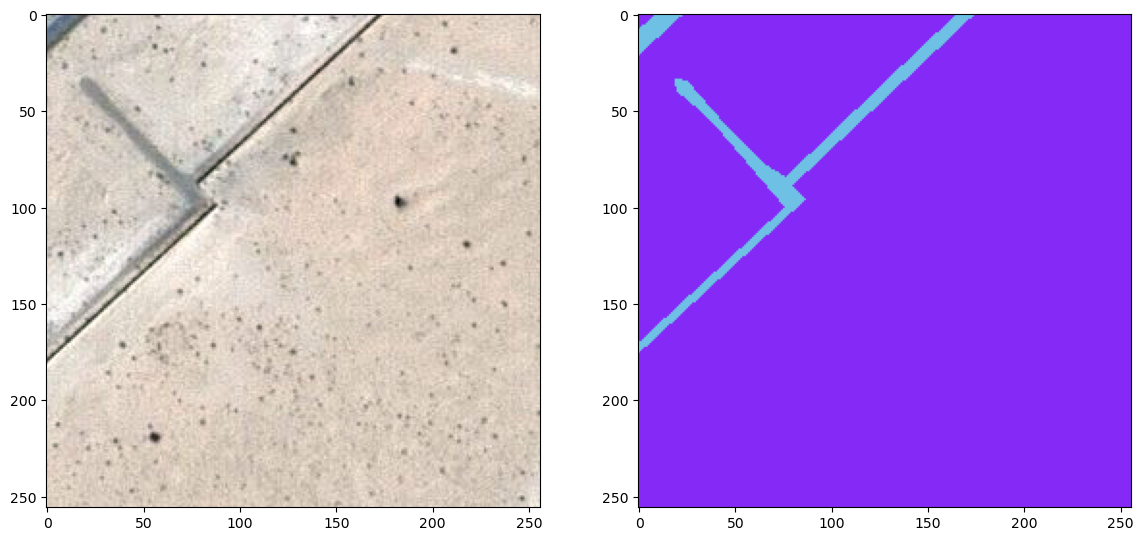

In [68]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])


In [69]:
# Apply OneHotEncoding with labels Hex Image type to Set RGB/Label



In [70]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [71]:
mask_dataset.shape

(945, 256, 256, 3)

In [72]:
label = individual_patched_mask


In [88]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [89]:

labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [90]:
print(len(labels))

945


In [91]:
labels = np.array(labels)

In [92]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [93]:
labels = np.expand_dims(labels, axis=3)

In [94]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [95]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

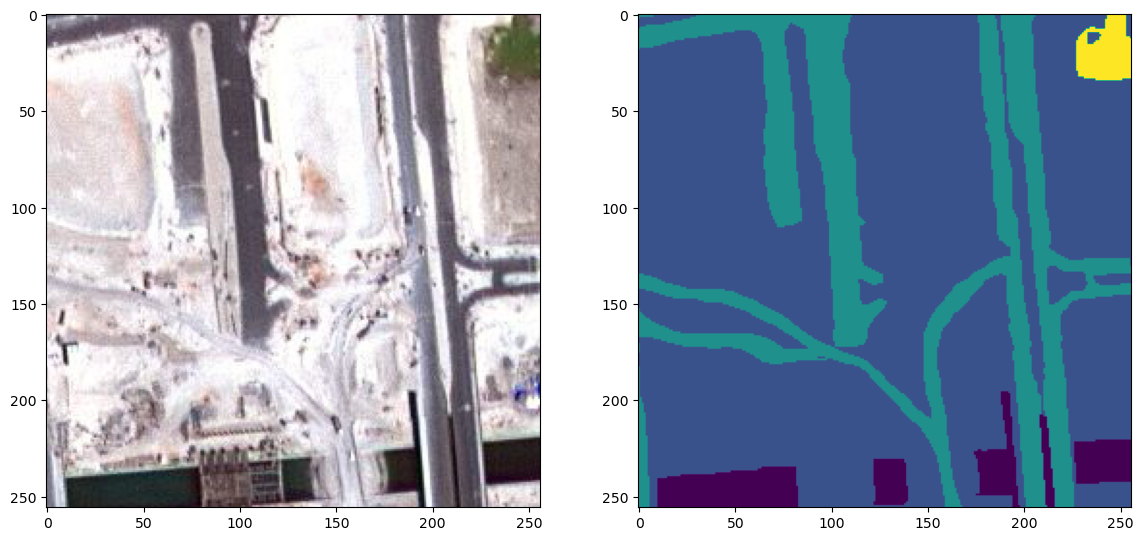

In [97]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0])


In [100]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [102]:
total_classes = len(np.unique(labels))

In [103]:
total_classes

6

In [106]:
from tensorflow.keras.utils import to_categorical

2023-05-26 16:06:18.082014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [101]:
master_training_dataset =   image_dataset

In [104]:
from sklearn.model_selection import train_test_split

In [107]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [109]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [116]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]

In [117]:
print(image_height)
print(image_width)
print(image_channels)

256
256
3
